# Simple Anomaly Detection in Time Series via Optimal Baseline Subtraction (OBS)
**Anomaly detection** in time series is used to identify unexpected patterns in your time series, and it is widely applied in different fields. In **energy engineering**, a spike in power usage might signal a fault. In **finance**, sudden drops or peaks can indicate major market events. In **mechanical systems**, unusual vibrations may reveal early signs of failure. In this blogpost, we will use **weather data** as an example use case, and we will find the anomalies in temperature time series for different cities all over the world.  

## Optimal Baseline Subtraction (OBS) Description

### OBS Introduction

If you have a bank of time series and you want to understand if and in what portion of the time series you have an anomaly, a simple but very efficient metod is called **optimal baseline subtraction (OBS)**. OBS is based on comparing each time series segment to the most similar historical pattern and analyzing the difference to detect unexpected deviations. 

### OBS Algorithm

The OBS algorithm is the following:

- **Split the time series into individual segments**, where each segment represents a unit of repeated behavior (e.g., a day, a cycle, or a process run).
- **Build a library of historical segments** by collecting all previous segments in the time series bank.
- **Compare your target segment** with all other segments in the library using a similarity metric, such as Mean Absolute Error (MAE).
- **Select the most similar segment** from the library as the optimal baseline.
- **Subtract the baseline from the target segment** to isolate the residual (i.e., the difference).
- **Analyze the residual** to identify large deviations, which are flagged as potential anomalies.

![Alt text](images/Workflow.png)



## Optimal Baseline Subtraction Application

### Script folder

You can find all the code and data you need in this [public github folder](https://github.com/PieroPaialungaAI/OptimalBaselineSubtraction.git), that you can download with:

```bash
git clone https://github.com/PieroPaialungaAI/OptimalBaselineSubtraction.git
```

### Data Source

The data used for this article originally come from an Open Database on Kaggle. You can find the original source of the dataset [here](https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data). Nonetheless, note that **you don't need to download it again, as everything you need is in the ```OBS_Data``` folder.**

### Preprocessed Data

The "preprocessing" part of the data is handled by the ```data.py``` code, so we can just deal with the fun stuff here. 

A table with the attributes for the cities can be found in the ```.city_attribute_data```:




In [1]:
from data import *
data = TimeSeriesData()
data.city_attribute_data.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


While the correspoding time series can be found in the  ```.temperature_data```, where each column represents a city, and the ```.datetime``` is the time step column. For example, the data for the city of **Vancouver** are the following:

In [2]:
data.temperature_data[['Vancouver','datetime']].head()

,Vancouver,datetime
0,284.630000,2012-10-01 13:00:00
1,284.629041,2012-10-01 14:00:00
2,284.626998,2012-10-01 15:00:00
3,284.624955,2012-10-01 16:00:00
4,284.622911,2012-10-01 17:00:00


### Selecting the Target Segment

So let's say we have our dataset and we want to see if there is an anomaly in a specific section. The following code pulls the city of interest and allows you to pick a specific window (e.g. a day, a week or a month) for that specific city. For example, let's pick **day** number **10** for **city = New York**.

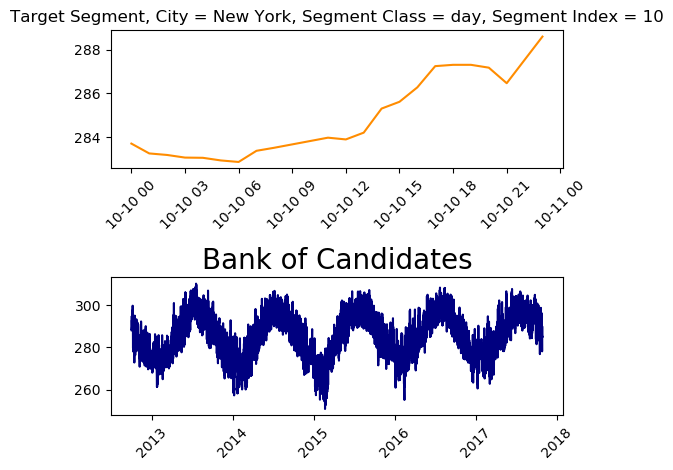

In [3]:
city = 'New York'
segment_class = 'day'
segment_idx = 10
data.isolate_city_and_time(city = city, segment_idx = segment_idx, segment_class = segment_class)
data.plot_target_and_baseline()
